Nama : Rianti Agustina
Nim  : 09011181924150
Kelas: SK5 B Reguler
Judul: Prediksi Demam Berdarah Menggunakan Metode Machine Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Penggunaan beberapa library yang diperlukan

In [16]:
train = pd.read_csv('Training_Data_Features.csv')

Untuk menampilkan hasil dari data yang telah di convert ke csv, dan berikut bawah ini merupakan hasilnya

In [17]:
train.sample(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
207,sj,1994,16,1994-04-23,NaN,NaN,0.152829,0.175457,0.00,297.541429,...,16.6,75.247143,0.00,14.294286,2.128571,25.971429,6.400000,30.0,22.2,28.7
1007,iq,2001,46,2001-11-12,0.277329,0.23030,0.277300,0.296971,61.82,298.847143,...,181.2,87.481429,61.82,17.800000,9.700000,28.440000,10.180000,34.5,21.0,43.9
505,sj,2000,2,2000-01-15,0.337000,0.30785,0.246686,0.168629,45.19,297.441429,...,47.1,77.342857,45.19,14.612857,2.057143,25.114286,5.157143,28.3,21.7,12.0
413,sj,1998,15,1998-04-09,0.048000,0.06520,0.098943,0.102771,12.01,297.871429,...,19.0,80.190000,12.01,15.635714,3.000000,26.028571,6.357143,31.7,21.7,10.7
28,sj,1990,46,1990-11-12,0.290800,0.22460,0.180386,0.234886,20.00,300.350000,...,7.1,75.728571,20.00,17.085714,2.200000,27.542857,8.600000,32.8,22.2,38.9


Terdapat hasil output seperti berikut ini, yang dimana ini merupakan kolom yang telah diconvert ke csv.

In [22]:
test = pd.read_csv('Test_Data_Features.csv')

In [23]:
test.shape

(416, 24)

In [24]:
feat_train = pd.read_csv('Training_Data_Labels.csv')

In [25]:
feat_train.shape

(1456, 4)

In [26]:
train.fillna(train.mean(), inplace = True)

In [27]:
test.fillna(train.mean(), inplace=True)

In [28]:
test.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

Disini terdapat output yang dimana pada code tersebut sum() merupakan bertambah satu untuk setiap contoh bernilai nol, dan tampaknya output tersebut adalah nilai beberapa banyak entri yang hilanguntuk setiap kolom dalam setiap bingkai data tersebut. Yang dimana isi dari output tersebut merupakan yang berupa mengenai kota, tahun, dan data-data lainnya.

In [29]:
import matplotlib.pyplot as plt

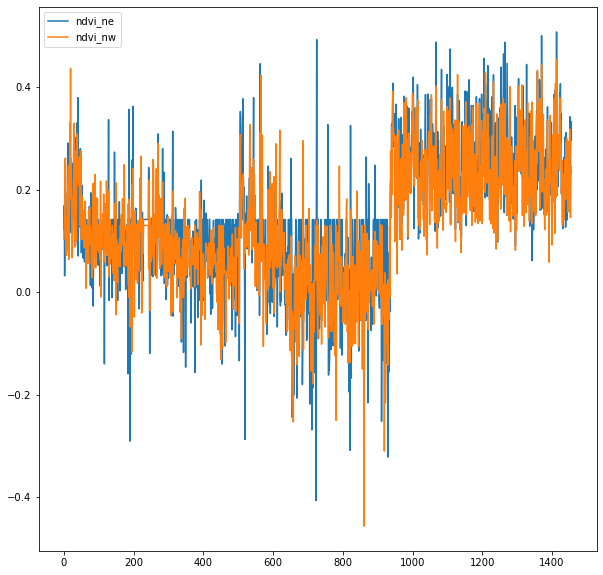

In [30]:
plt.figure(figsize=(10,10))
train['ndvi_ne'].plot()
train['ndvi_nw'].plot()
plt.legend()

Dengan hasil output yang diatas, dapat dilihat ini merupakan deteksi elemen otomatis yang menampilkan seperti output legenda diatas

In [31]:
df=pd.merge(train, feat_train)

In [32]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


Disini kembali menampilkan output kembali, yang dimana untuk melihat pada baris pertama dalam hasil output

In [33]:
c1=df[df['city']=='sj']

In [34]:
c1.shape

(936, 25)

In [35]:
c2=df[df['city']=='iq']

In [36]:
c2.shape

(520, 25)

In [41]:
c1['week_start_date']=pd.to_datetime(c1['week_start_date'])

<ipython-input-41-745172b1c249>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['week_start_date']=pd.to_datetime(c1['week_start_date'])


In [42]:
c1.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

In [43]:
%timeit pd.to_datetime(c1['week_start_date'], infer_datetime_format=True)

995 µs ± 81.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [44]:
c1.set_index(c1['week_start_date'], inplace=True)

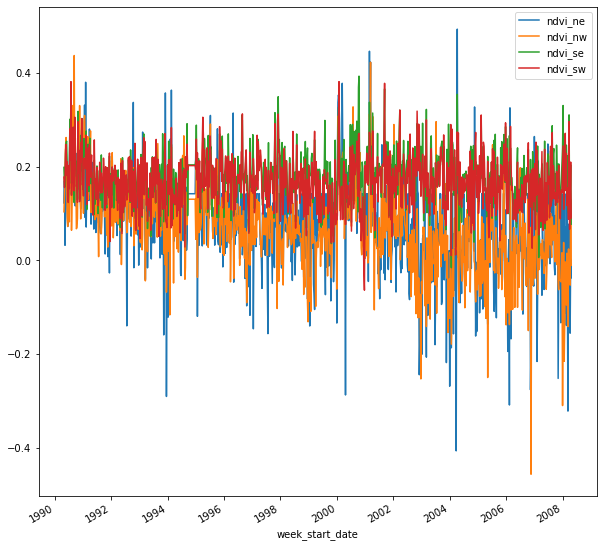

In [45]:
plt.figure(figsize=(10,10))
c1['ndvi_ne'].plot()
c1['ndvi_nw'].plot()
c1['ndvi_se'].plot()
c1['ndvi_sw'].plot()
plt.legend()
plt.show()

In [46]:
%timeit pd.to_datetime(c2['week_start_date'], infer_datetime_format=True)

3.17 ms ± 538 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
c2.set_index(c2['week_start_date'], inplace=True)

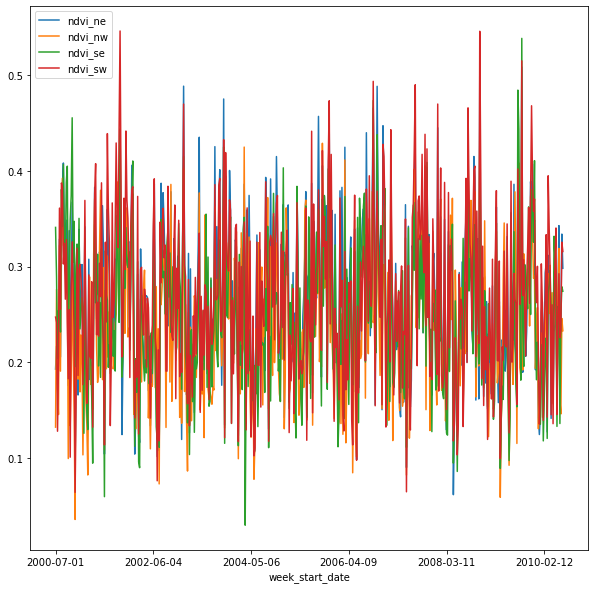

In [48]:
plt.figure(figsize=(10,10))
c2['ndvi_ne'].plot()
c2['ndvi_nw'].plot()
c2['ndvi_se'].plot()
c2['ndvi_sw'].plot()
plt.legend()
plt.show()

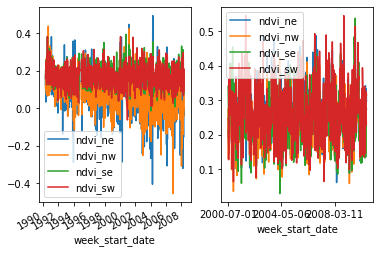

In [49]:
plt.subplot(1,2,1)
c1['ndvi_ne'].plot()
c1['ndvi_nw'].plot()
c1['ndvi_se'].plot()
c1['ndvi_sw'].plot()
plt.legend()
plt.subplot(1,2,2)
c2['ndvi_ne'].plot()
c2['ndvi_nw'].plot()
c2['ndvi_se'].plot()
c2['ndvi_sw'].plot()
plt.legend()

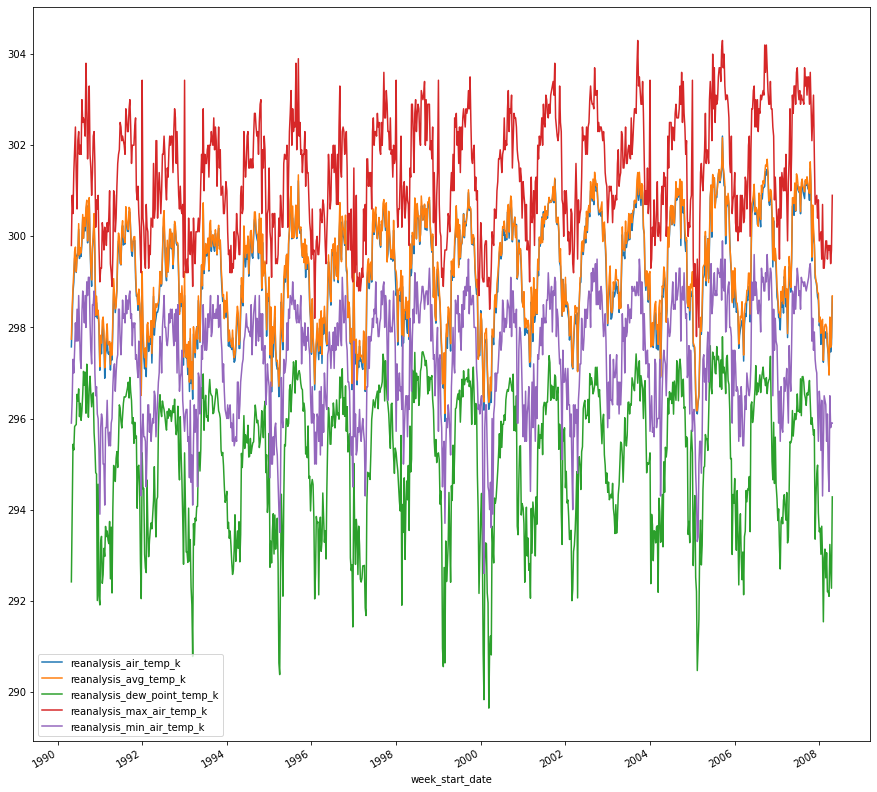

In [50]:
plt.figure(figsize=(15,15))
c1['reanalysis_air_temp_k'].plot()
c1['reanalysis_avg_temp_k'].plot()
c1['reanalysis_dew_point_temp_k'].plot()
c1['reanalysis_max_air_temp_k'].plot()
c1['reanalysis_min_air_temp_k'].plot()
plt.legend()

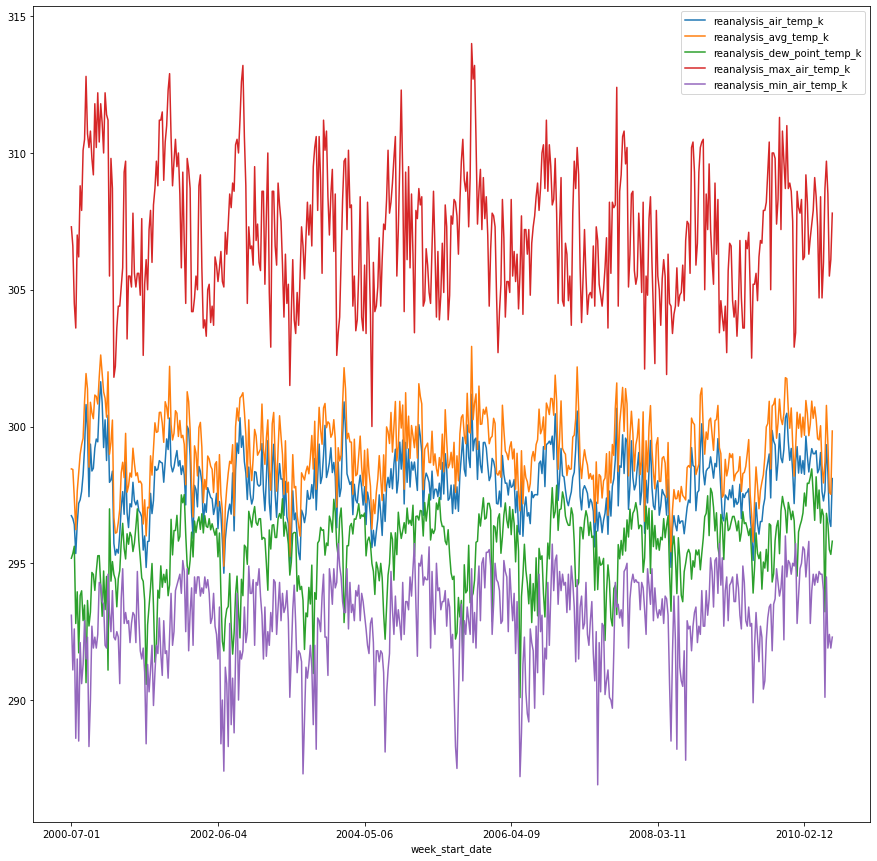

In [51]:
plt.figure(figsize=(15,15))
c2['reanalysis_air_temp_k'].plot()
c2['reanalysis_avg_temp_k'].plot()
c2['reanalysis_dew_point_temp_k'].plot()
c2['reanalysis_max_air_temp_k'].plot()
c2['reanalysis_min_air_temp_k'].plot()
plt.legend()

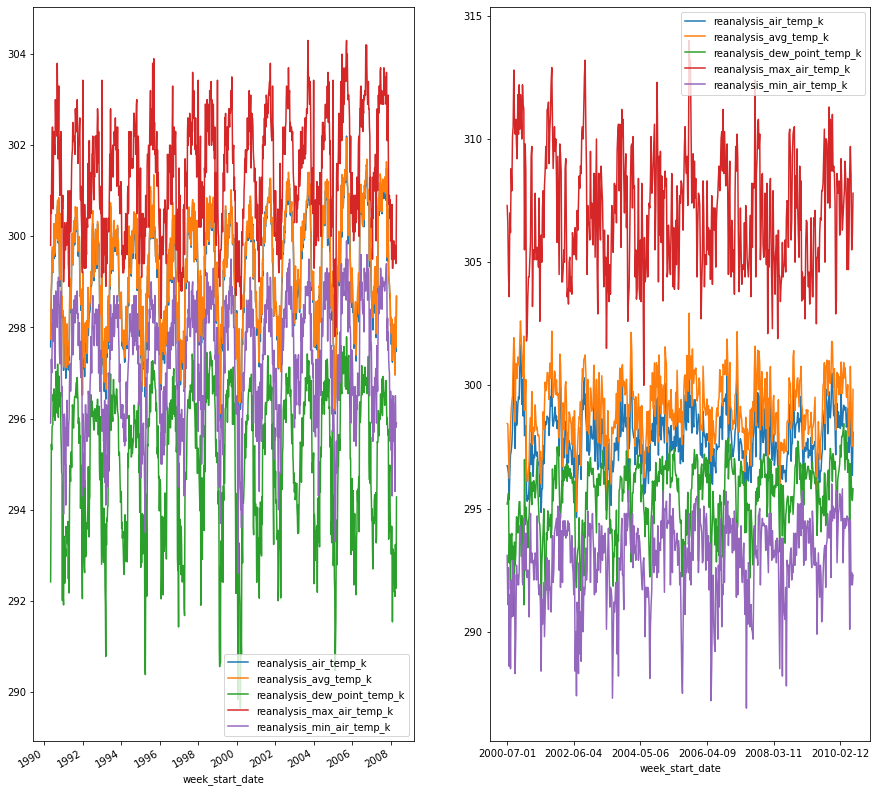

In [52]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
c1['reanalysis_air_temp_k'].plot()
c1['reanalysis_avg_temp_k'].plot()
c1['reanalysis_dew_point_temp_k'].plot()
c1['reanalysis_max_air_temp_k'].plot()
c1['reanalysis_min_air_temp_k'].plot()
plt.legend()
plt.subplot(1,2,2)
c2['reanalysis_air_temp_k'].plot()
c2['reanalysis_avg_temp_k'].plot()
c2['reanalysis_dew_point_temp_k'].plot()
c2['reanalysis_max_air_temp_k'].plot()
c2['reanalysis_min_air_temp_k'].plot()
plt.legend()

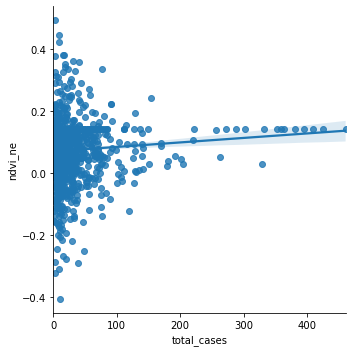

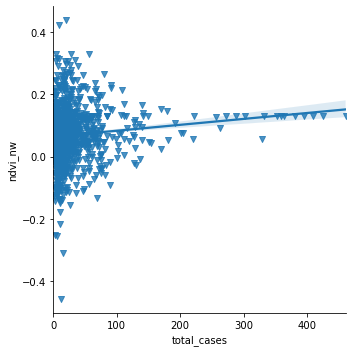

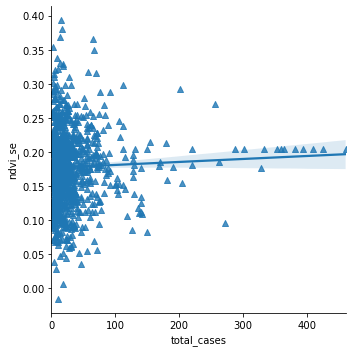

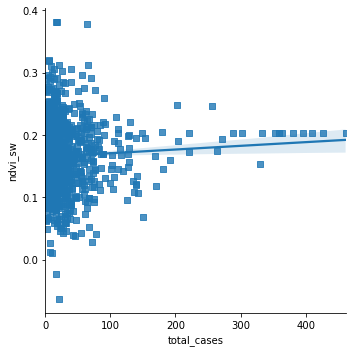

In [53]:
g=sns.lmplot(x='total_cases', y='ndvi_ne', data=c1, markers='o')
g=sns.lmplot(x='total_cases', y='ndvi_nw', data=c1, markers='v')
g=sns.lmplot(x='total_cases', y='ndvi_se', data=c1, markers='^')
g=sns.lmplot(x='total_cases', y='ndvi_sw', data=c1, markers='s')

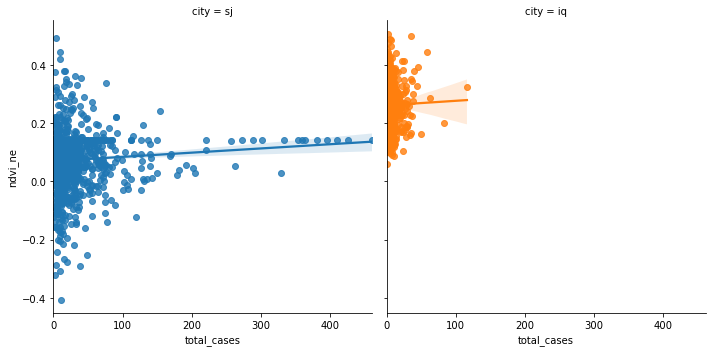

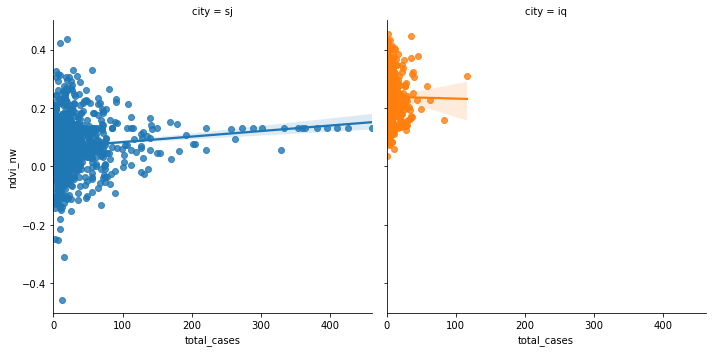

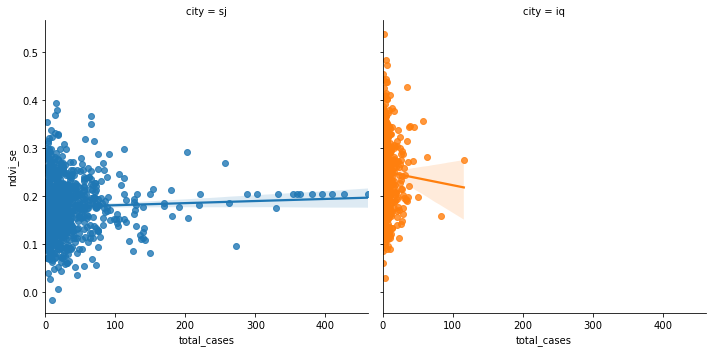

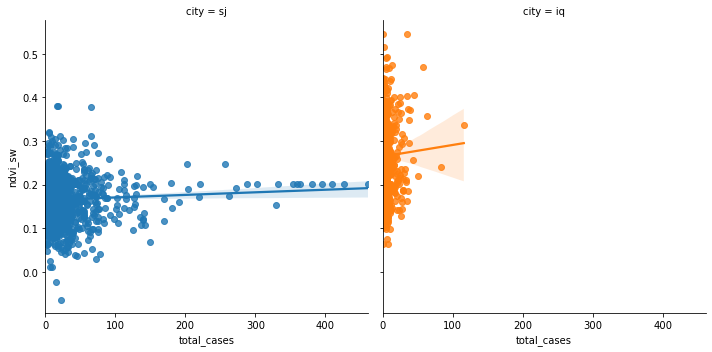

In [54]:
g=sns.lmplot(x='total_cases', y='ndvi_ne', data=df, markers='o', col='city', hue='city')
g=sns.lmplot(x='total_cases', y='ndvi_nw', data=df, markers='o', col='city', hue='city')
g=sns.lmplot(x='total_cases', y='ndvi_se', data=df, markers='o', col='city', hue='city')
g=sns.lmplot(x='total_cases', y='ndvi_sw', data=df, markers='o', col='city', hue='city')

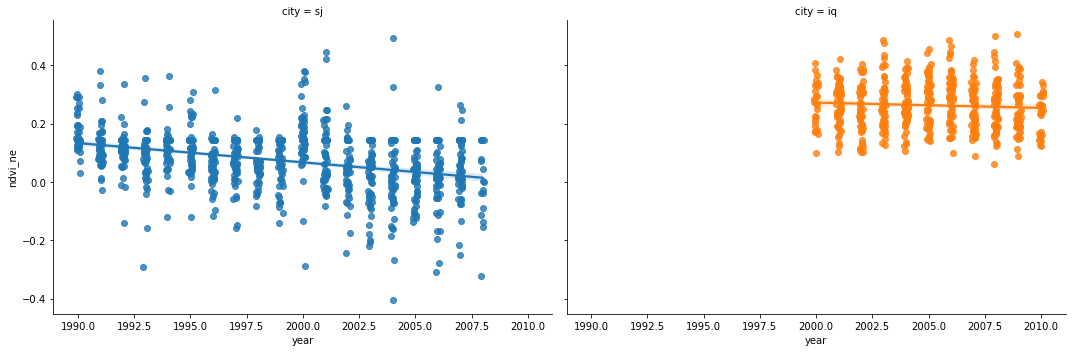

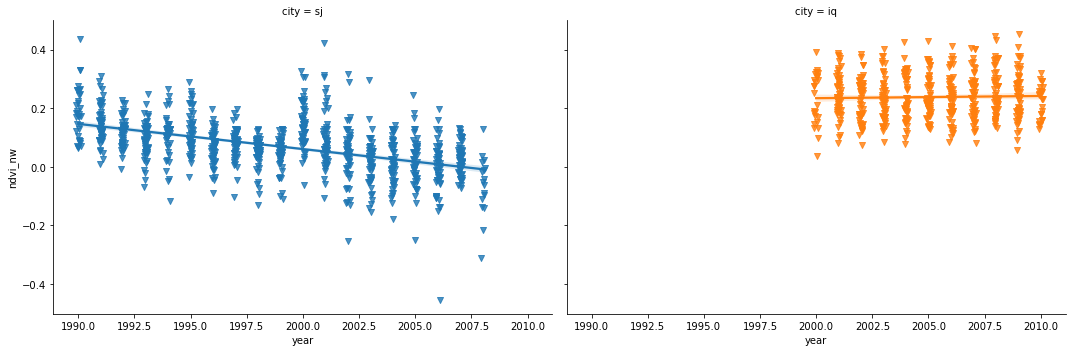

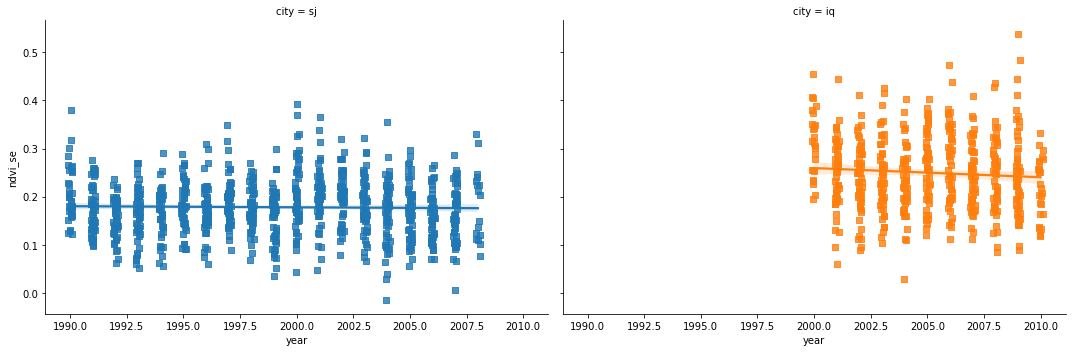

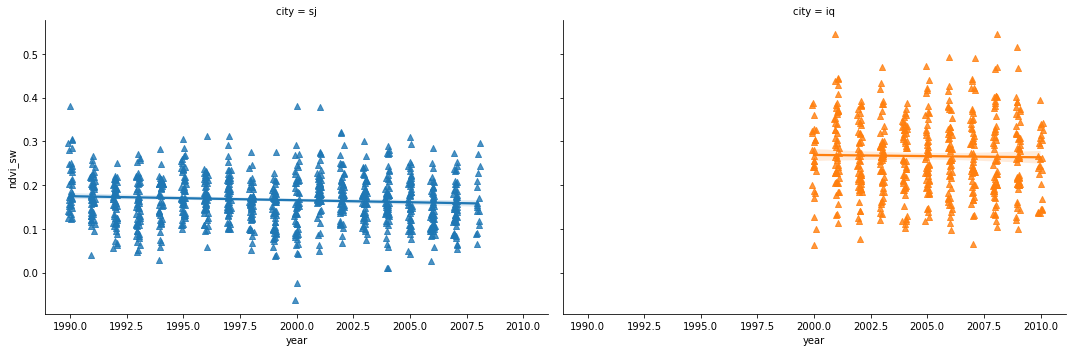

In [55]:
g=sns.lmplot(x='year', y='ndvi_ne', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='ndvi_nw', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='ndvi_se', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='ndvi_sw', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)

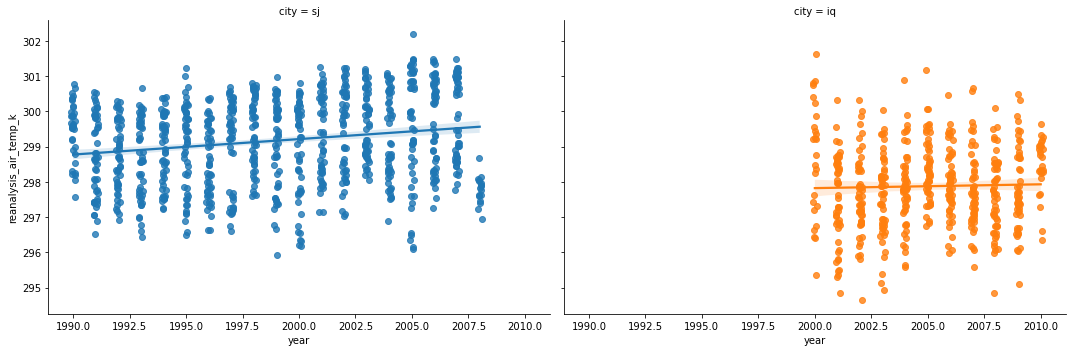

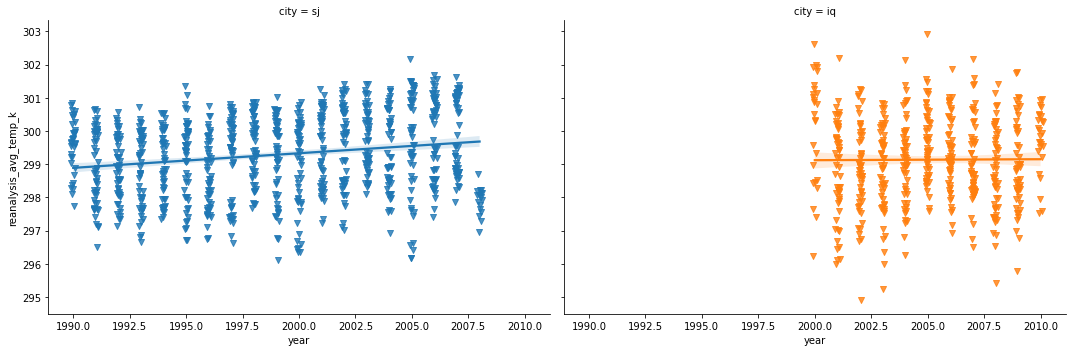

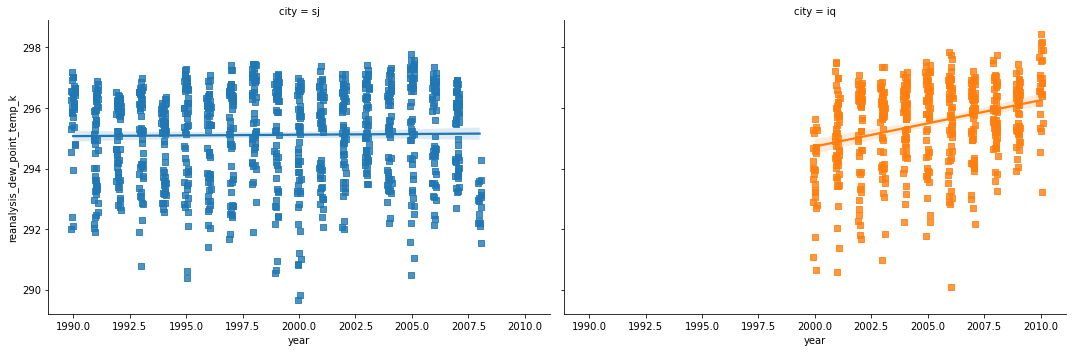

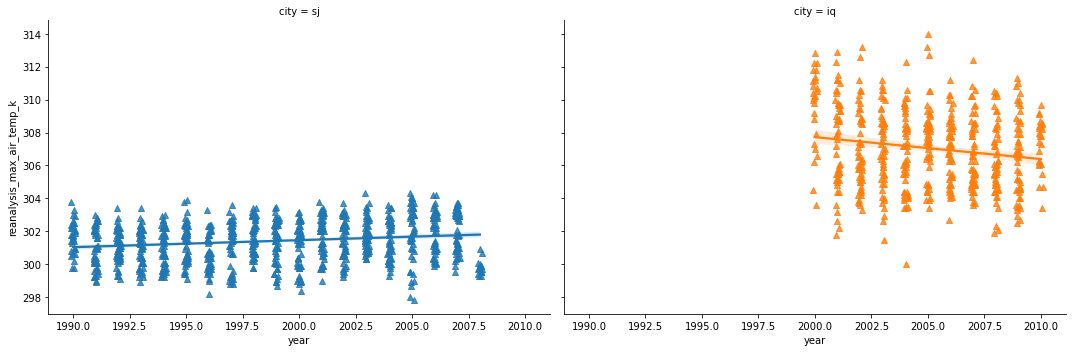

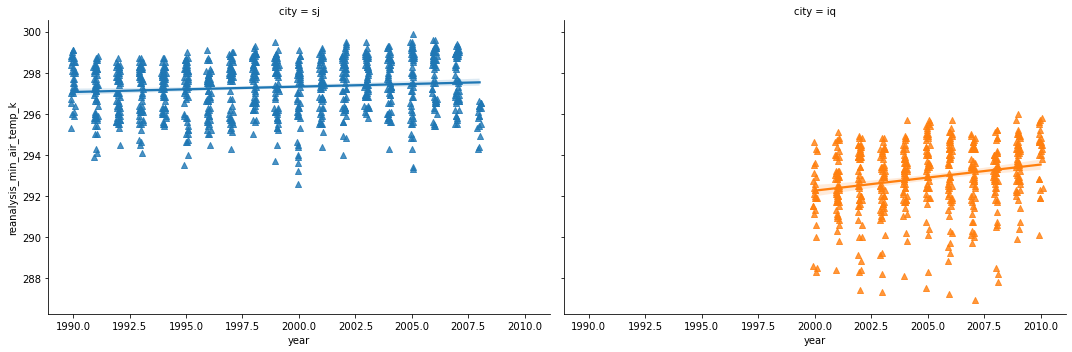

In [56]:
g=sns.lmplot(x='year', y='reanalysis_air_temp_k', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_avg_temp_k', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_dew_point_temp_k', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_max_air_temp_k', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_min_air_temp_k', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)

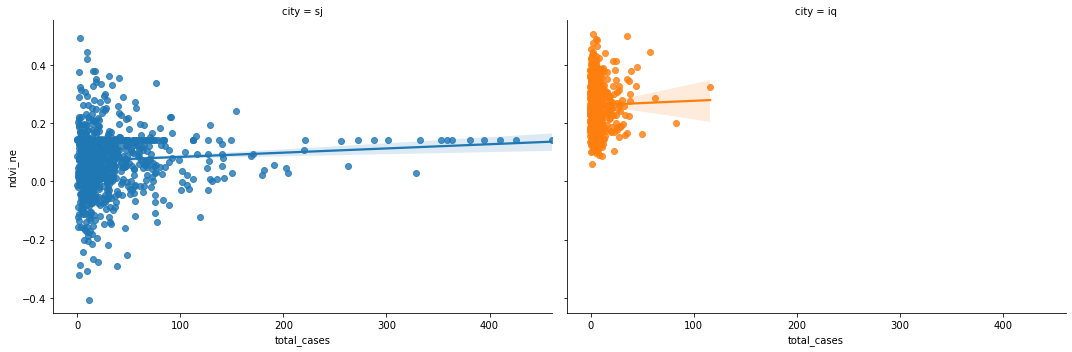

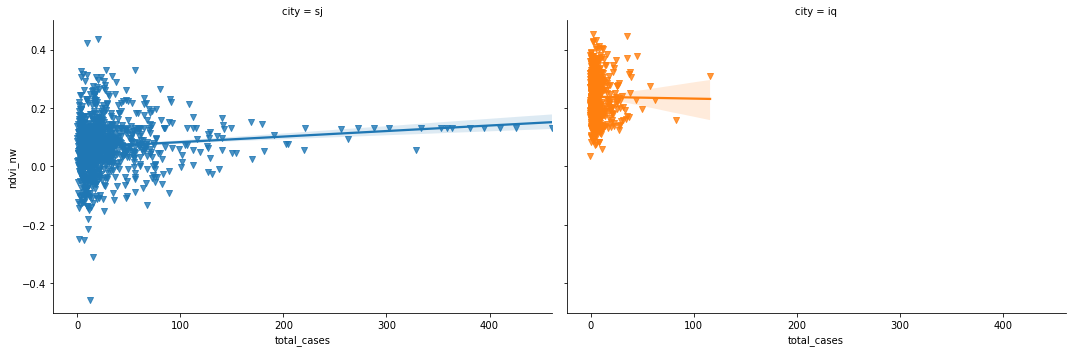

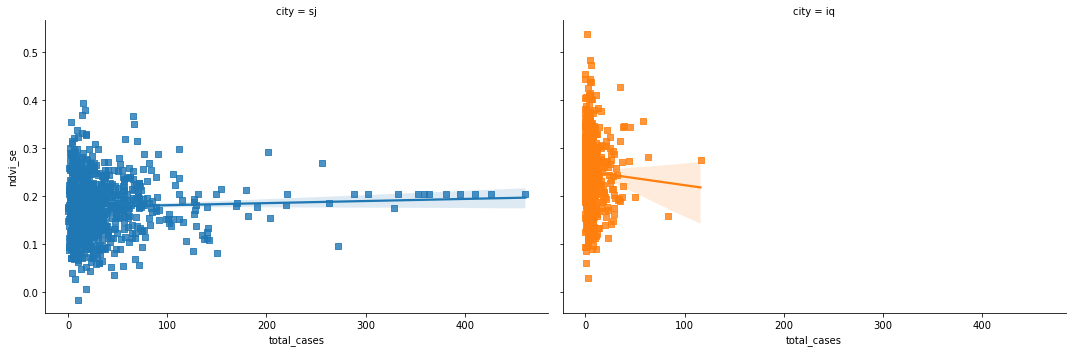

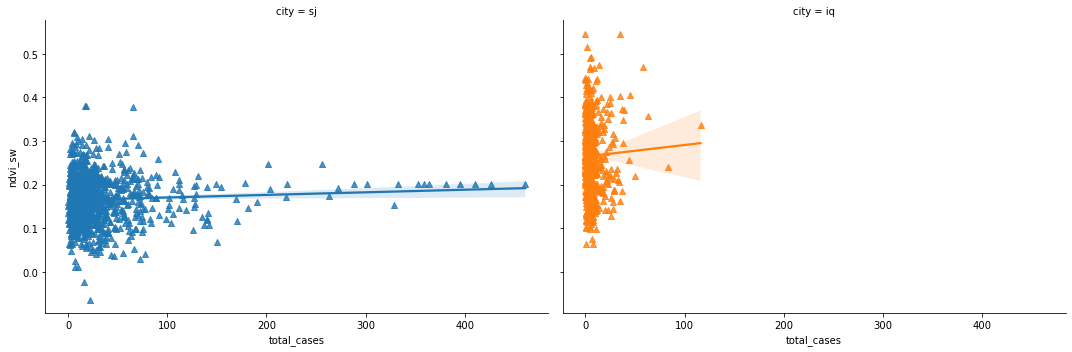

In [57]:
g=sns.lmplot(x='total_cases', y='ndvi_ne', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='ndvi_nw', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='ndvi_se', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='ndvi_sw', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)

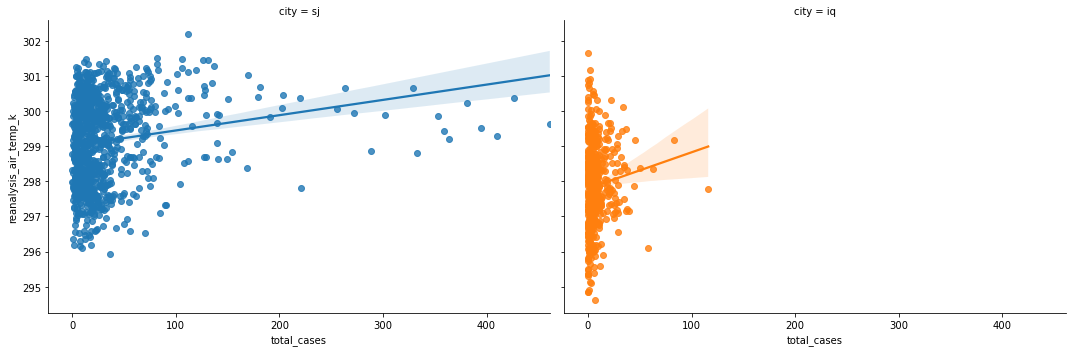

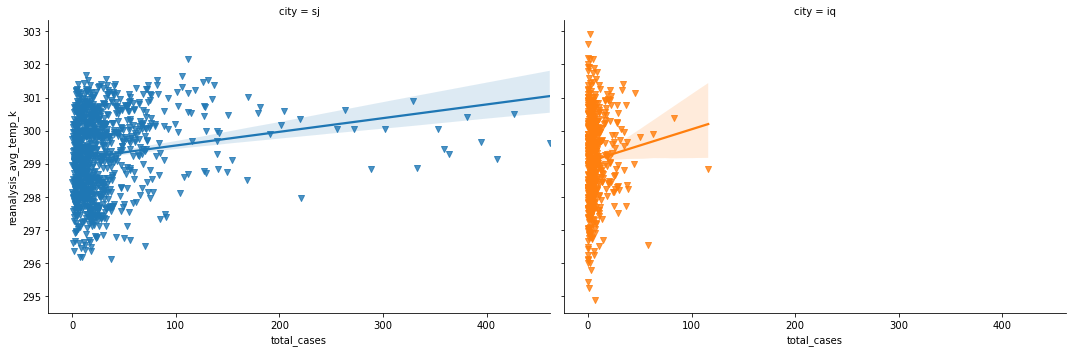

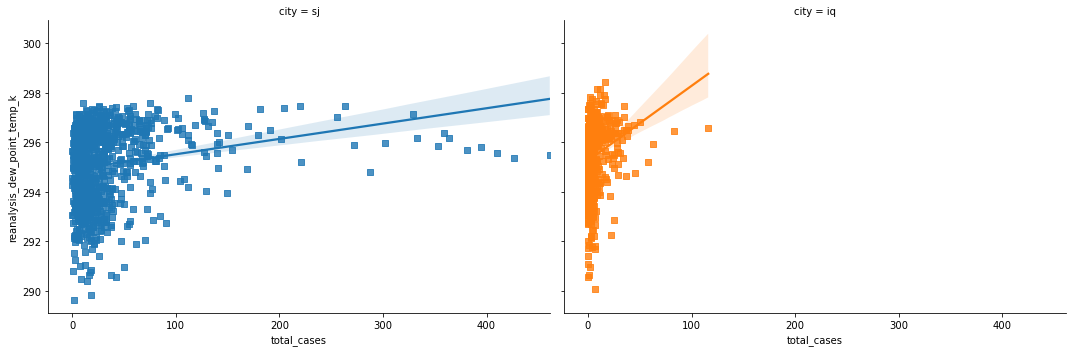

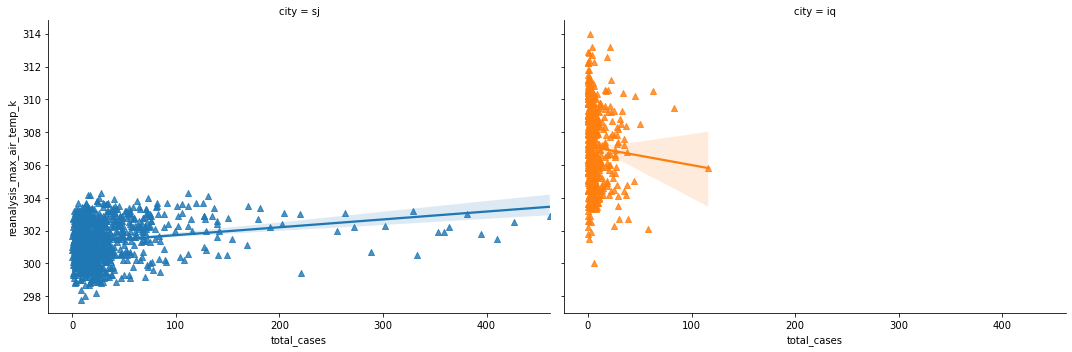

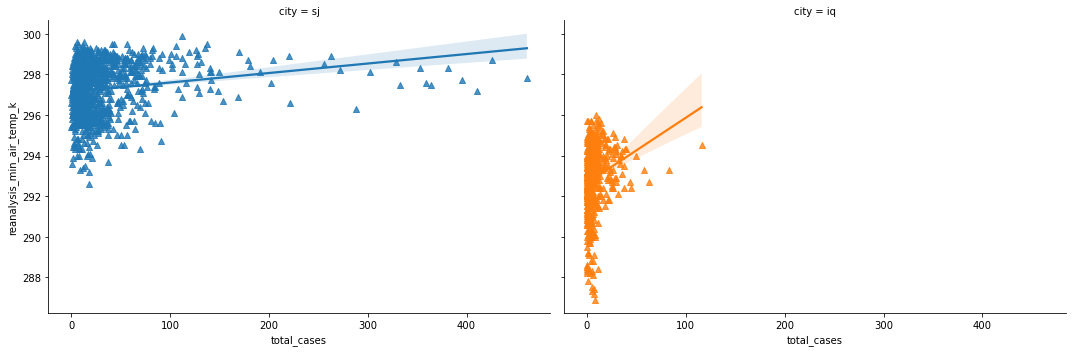

In [58]:
g=sns.lmplot(x='total_cases', y='reanalysis_air_temp_k', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_avg_temp_k', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_dew_point_temp_k', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_max_air_temp_k', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_min_air_temp_k', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)

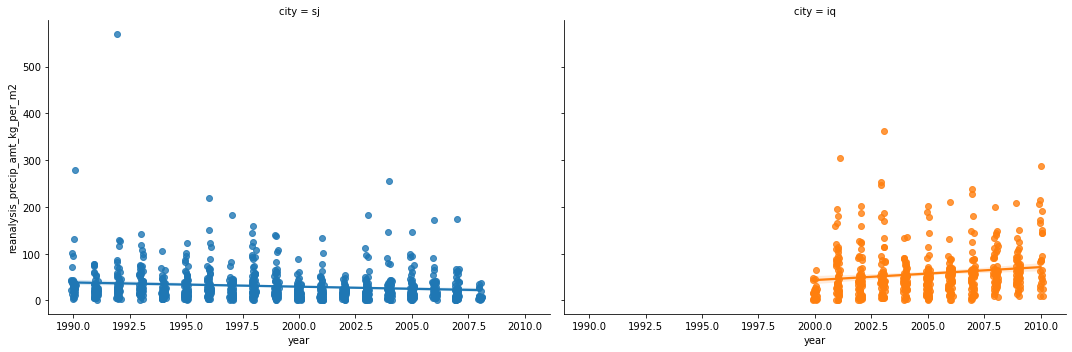

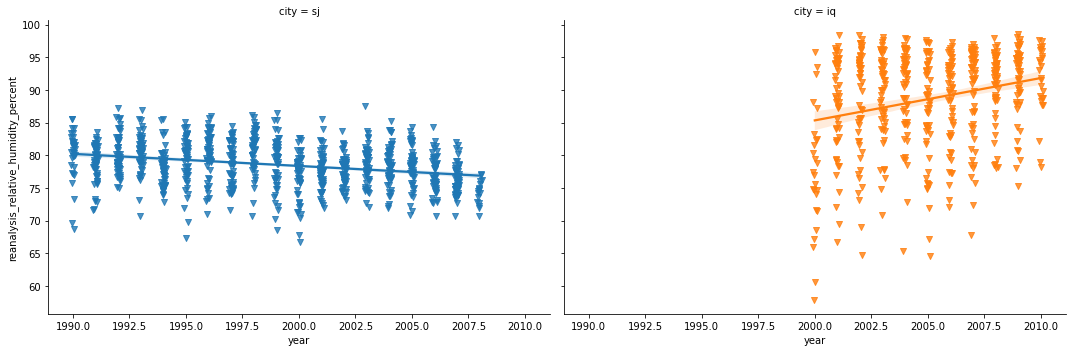

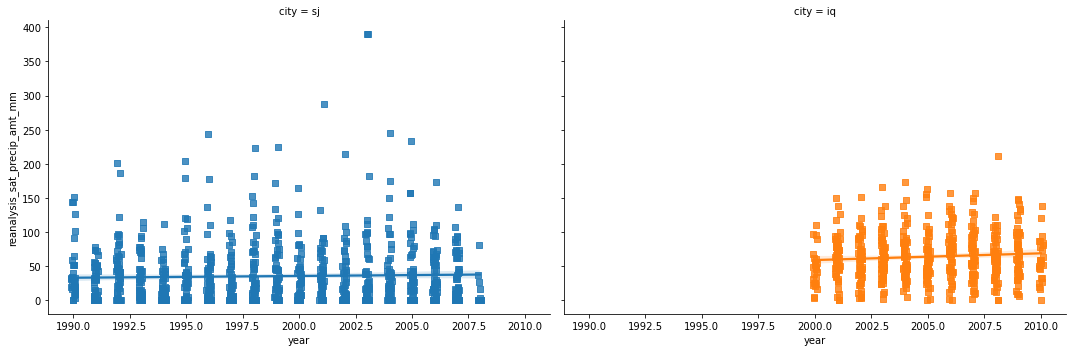

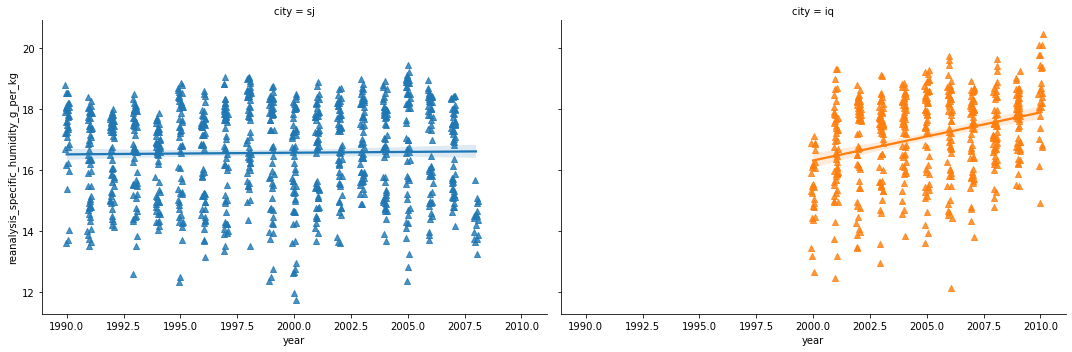

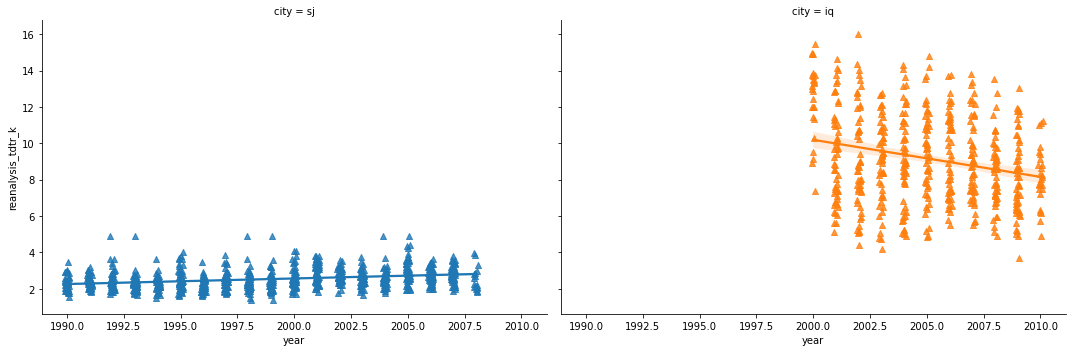

In [59]:
g=sns.lmplot(x='year', y='reanalysis_precip_amt_kg_per_m2', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_relative_humidity_percent', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_sat_precip_amt_mm', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_specific_humidity_g_per_kg', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_tdtr_k', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)

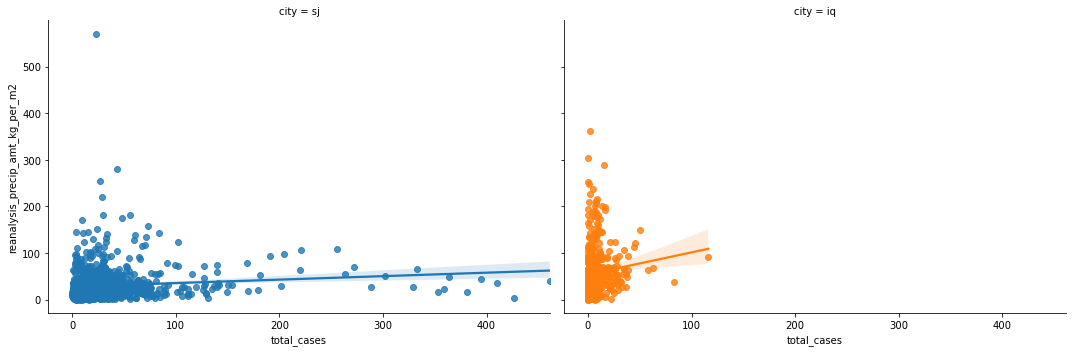

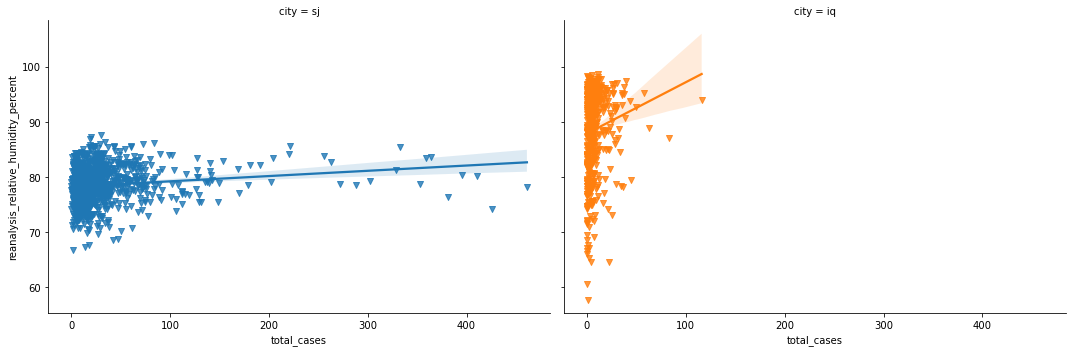

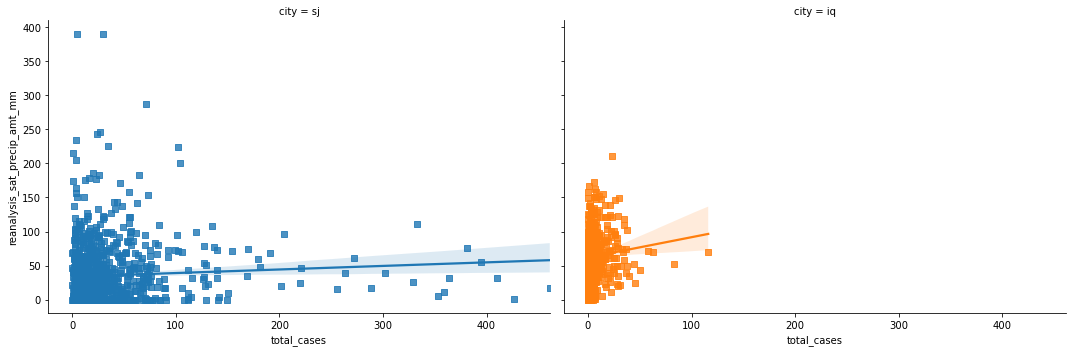

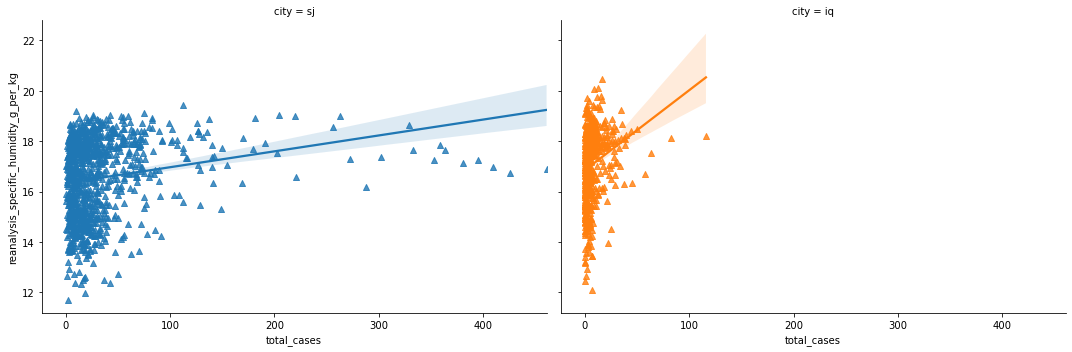

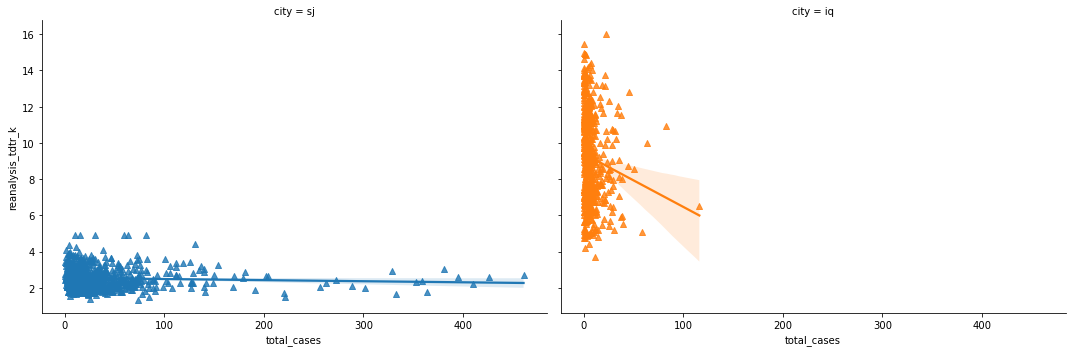

In [60]:
g=sns.lmplot(x='total_cases', y='reanalysis_precip_amt_kg_per_m2', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_relative_humidity_percent', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_sat_precip_amt_mm', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_specific_humidity_g_per_kg', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_tdtr_k', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)

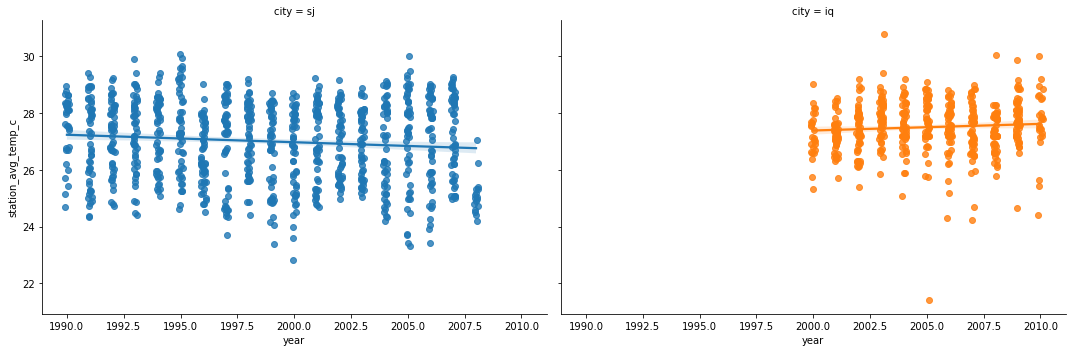

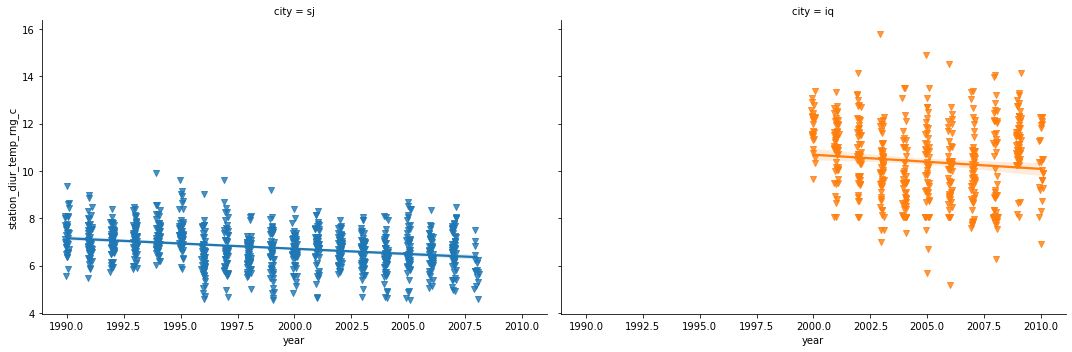

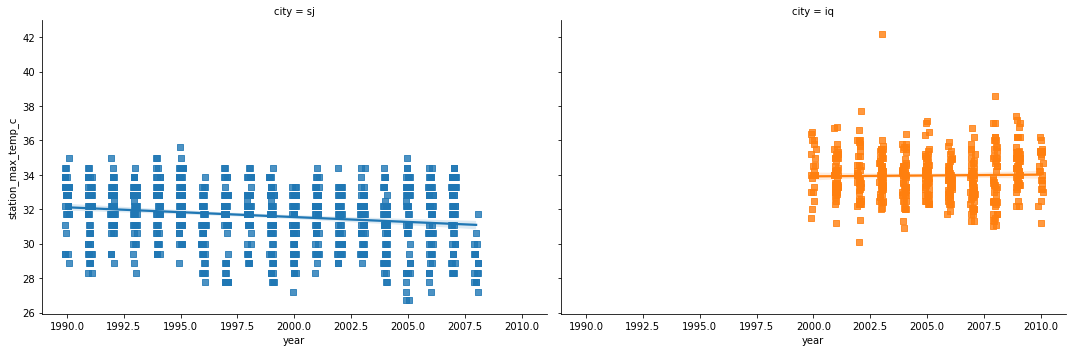

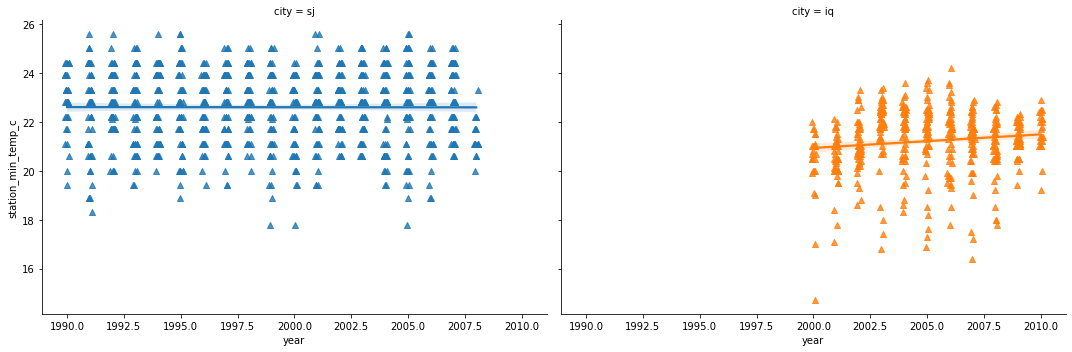

In [61]:
g=sns.lmplot(x='year', y='station_avg_temp_c', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='station_diur_temp_rng_c', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='station_max_temp_c', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='station_min_temp_c', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)

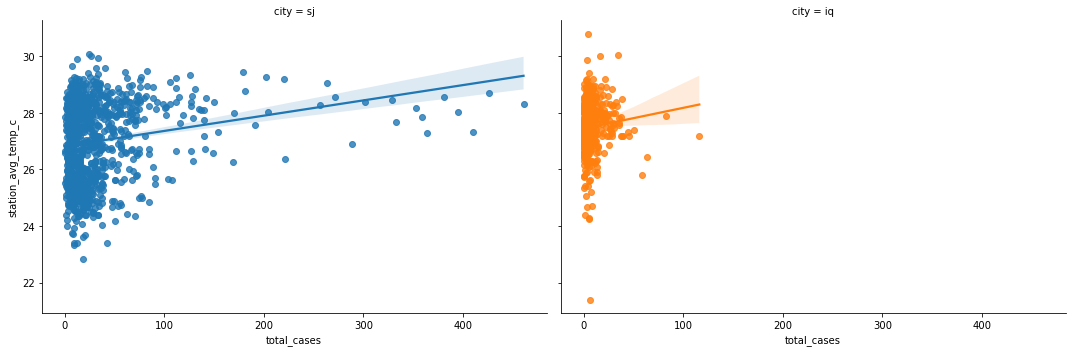

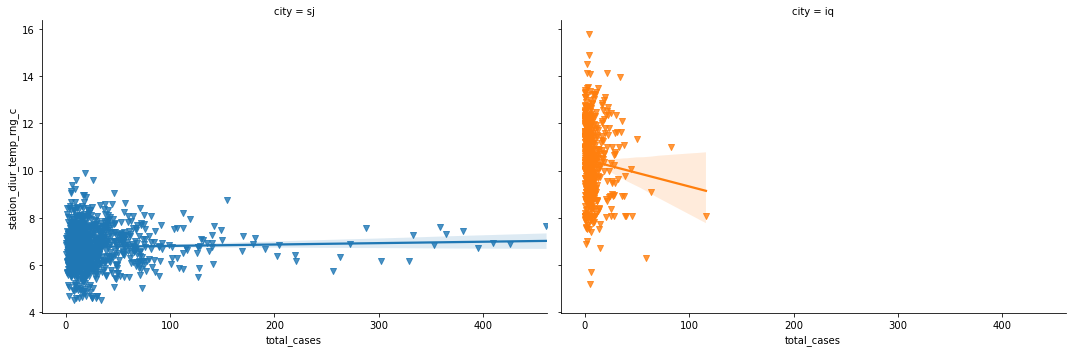

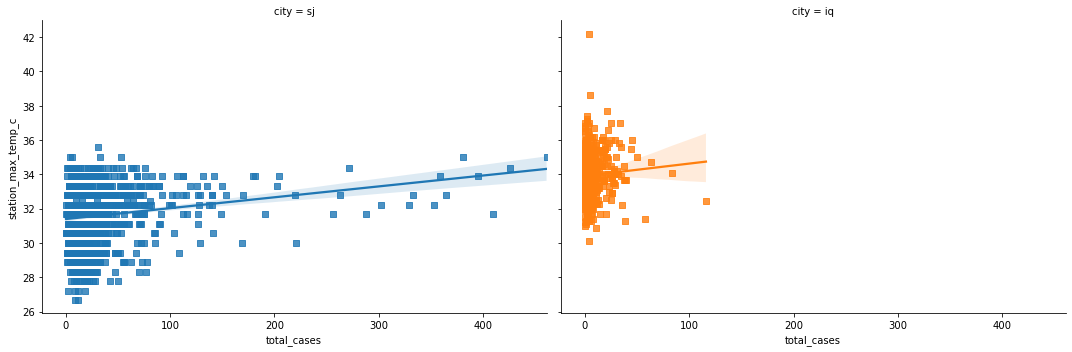

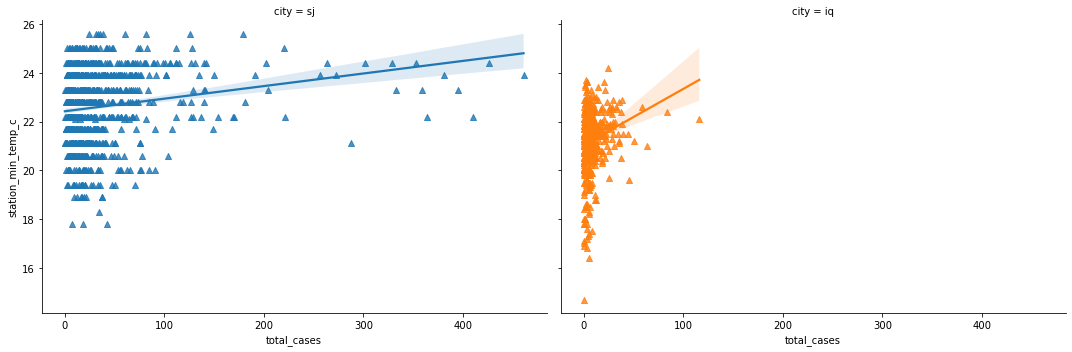

In [62]:
g=sns.lmplot(x='total_cases', y='station_avg_temp_c', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='station_diur_temp_rng_c', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='station_max_temp_c', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='station_min_temp_c', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)

In [63]:
feature_col=['city','week_start_date', 'total_cases','weekofyear']
X=df.drop(feature_col, axis=1)

In [64]:
X.shape

(1456, 21)

In [65]:
y=df.iloc[:,24]

In [66]:
y.shape

(1456,)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [69]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.09589041 0.03424658 0.08219178 0.08219178 0.08219178 0.05479452
 0.04137931 0.02758621 0.06206897 0.06896552]


In [70]:
np.mean(score)*100

6.315068493150686

In [71]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.08219178 0.06849315 0.10958904 0.07534247 0.06164384 0.09589041
 0.06206897 0.05517241 0.03448276 0.05517241]


In [72]:
np.mean(score)*100

7.000472366556447

In [73]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.10958904 0.10273973 0.10273973 0.10958904 0.07534247 0.09589041
 0.09655172 0.06896552 0.06896552 0.08965517]


In [74]:
np.mean(score)*100

9.20028341993387

In [75]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.07534247 0.08219178 0.04794521 0.06849315 0.04794521 0.09589041
 0.06206897 0.04827586 0.08965517 0.08275862]


In [76]:
np.mean(score)*100

7.005668398677374

In [77]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.06849315 0.06849315 0.06164384 0.06849315 0.06164384 0.07534247
 0.06206897 0.05517241 0.07586207 0.08965517]


In [78]:
np.mean(score)*100

6.86868209730751

In [79]:
test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,0.130553,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,0.142294,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [80]:
feature_col=['city','week_start_date', 'weekofyear']
test=test.drop(feature_col, axis=1)

In [81]:
clf=SVC()
clf.fit(X, y)

pred=clf.predict(test)

In [82]:
submission = pd.DataFrame({
        "total": pred
})

submission.to_csv('submission_format.csv', index=False)

In [83]:
submission = pd.read_csv('submission_format.csv')
submission.head()

,total
0,0
1,0
2,0
3,0
4,0
